# Notebook to make Figure 6

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_palette('coolwarm')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_extrinsic_angles/'

### Setup

Load data

In [2]:
# Load in the signals' parameters
injected_params_dict = h5ify.load(data_dir+'parameters_angle_diagram.h5')
maxL_params = h5ify.load(data_dir+'../real_and_maxL_GW190521/GW190521_maxL_parameters.h5')

# Load in the signals' strain
injection_strain_dict = h5ify.load(data_dir+'waveforms_angle_diagram.h5')
maxL_inj = h5ify.load(data_dir+'../real_and_maxL_GW190521/GW190521_maxL_strain_conditioned.h5')

Set up plotting aesthetics

In [3]:
# Values of angles to plot (over pi)
angle_vals = [0, 0.25, 0.5, 0.75, 1]

# Associated labels
angle_label = [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']

# Associated colors
colors = ['goldenrod', 'C0', 'C5', 'C1', 'goldenrod']

# Associated linestyles
linestyles = ['-', '-', '-', '-', '-']

# Make into a dict
angles_dict = {k:{'color':c, 'ls':ls, 'label':lbl} for k, c, ls, lbl in zip(angle_vals, colors, linestyles, angle_label)}

# Parameter names and which to plot
params = {'inclination':r'$\iota$', 'polarization':r'$\psi$', 'phase':r'$\varphi$'}
angles_to_plot = {'inclination':[0.5, 1], 'polarization':[0.25], 'phase':[0]}

### Make Figure

Note that the first part of Figure 6 (the diagrams) were made in Keynote and are thus not included in this code release.

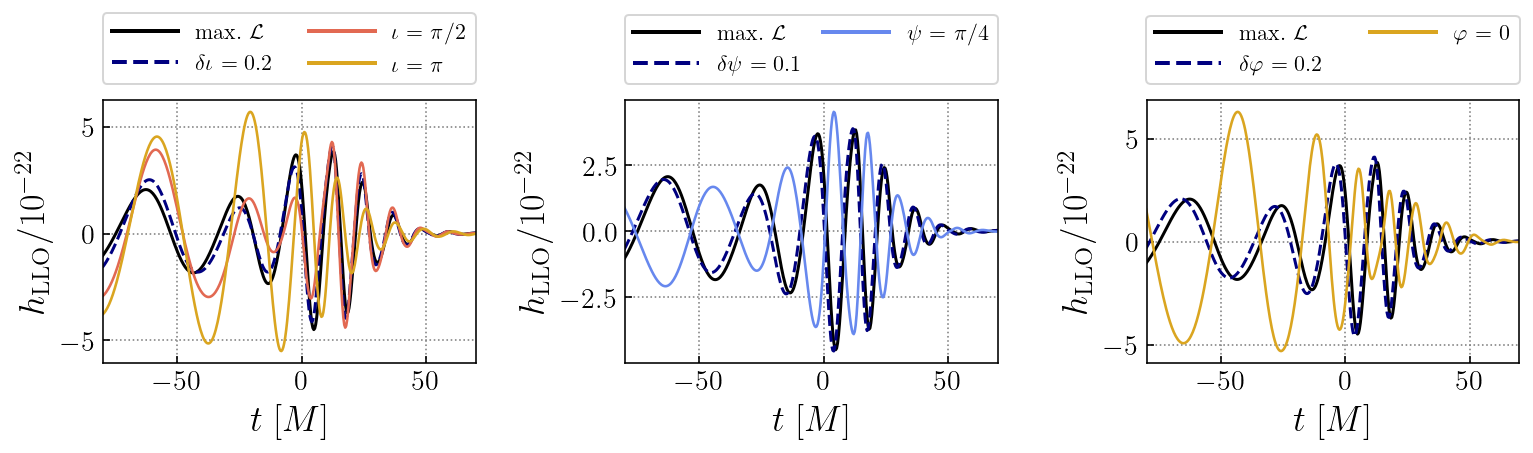

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(pf.DEFAULT_FIG_WIDTH*1.1, 5.5/2.5*1.1))

# times in units of M
times = maxL_inj['time_dict']['L1'] - maxL_params['L1_time']
times_M = pf.transform_s_to_M(times,  maxL_params['mtotal'])   
    
# cycle through each angle 
for ax, param in zip(axes, params): 
    
    # plot GW190521 maxL in each plot
    ax.plot(times_M, maxL_inj['data_dict']['L1']/1e-22, color='k', label=r'$\mathrm{max.~}\mathcal{L}$')
    
    # and plot amplitude
    
    for epsilon in [0.2]:  
        if param=='polarization':
            epsilon/=2
        key = f'{param} maxL + {epsilon}'
        strain = np.asarray(injection_strain_dict[key]['strain']['L1'])/1e-22

        label = r'$\delta$' + params[param] + rf' $= {epsilon}$'
        ax.plot(times_M[:-1], strain, label=label, color='navy', ls='--')
        
    for angle in angles_to_plot[param]:    
        key = f'{param} {angle} pi'
        strain = injection_strain_dict[key]['strain']['L1']/1e-22

        label = params[param] + r' $=$ ' + angles_dict[angle]['label']
        ax.plot(times_M[:-1], strain, label=label, lw=1.3, color=angles_dict[angle]['color'], ls=angles_dict[angle]['ls'])
        
for ax in axes: 
    ax.set_xlim(-80,70)

    ax.set_xlabel('$t~[M]$')
    ax.set_ylabel(r'$h_{\rm LLO} / 10^{-22}$')
    
    leg = ax.legend(bbox_to_anchor=(-0.03, 1.02, 1.06, 0.102), loc="lower left",
                    ncol=2, mode="expand", fontsize=11, frameon=True, handlelength=3)
    for l in leg.get_lines():
        l.set_linewidth(2)
    
plt.subplots_adjust(wspace=0.4)

plt.savefig('figure_06.png', dpi=300, bbox_inches='tight')
plt.show()